In this task we are supposed to generate a cloud of point from 2D normal distribiution and see how will the 3-means algorithm behave on it.

Firstly, let's run it one time and plot the result to see how it behaves.

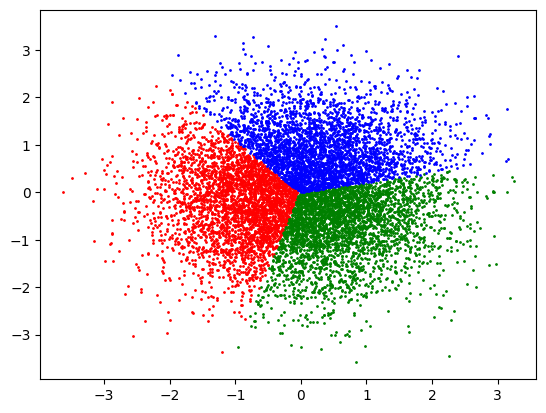

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

X = np.random.normal(0, 1, 10000)
Y = np.random.normal(0, 1, 10000)

points = np.array([(X[i], Y[i]) for i in range(10000)])

kmeans = KMeans(n_clusters=3).fit(points)

X0 = [X[i] for i in range(10000) if kmeans.labels_[i] == 0]
Y0 = [Y[i] for i in range(10000) if kmeans.labels_[i] == 0]
X1 = [X[i] for i in range(10000) if kmeans.labels_[i] == 1]
Y1 = [Y[i] for i in range(10000) if kmeans.labels_[i] == 1]
X2 = [X[i] for i in range(10000) if kmeans.labels_[i] == 2]
Y2 = [Y[i] for i in range(10000) if kmeans.labels_[i] == 2]

plt.scatter(X0, Y0, color='red', s=1)
plt.scatter(X1, Y1, color='green', s=1)
plt.scatter(X2, Y2, color='blue', s=1)
plt.show()

As expected, 3-means algorithm finds 3 symetric clusters. Now lets run it "a few" more times until the average of centroids converges.

Number of iterations = 1188


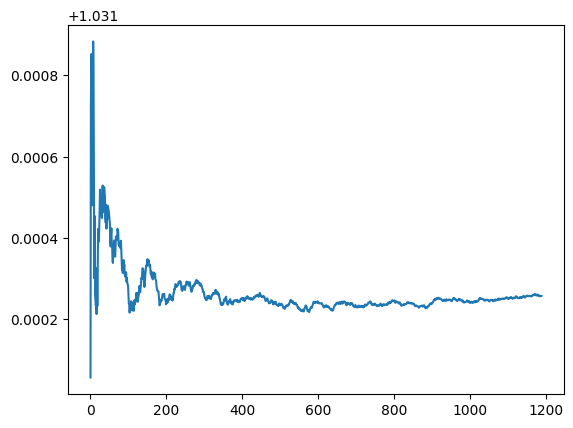

In [ ]:
R_sum = 0
R_avg = []

precision_achieved = False
i = 0
while not precision_achieved:
  kmeans = KMeans(n_clusters=3).fit(points)
  centroids = kmeans.cluster_centers_
  norms = np.array([math.sqrt(centroids[j][0] ** 2 + centroids[j][1] ** 2) for j in range(3)])
  R_sum += norms.mean()
  R_avg.append(R_sum / (i + 1))

  if i != 0 and abs(R_avg[i] - R_avg[i-1]) < 1e-9:
    print("Number of iterations = " + str(i))
    precision_achieved = True
  i += 1

plt.plot(range(1, i+1), R_avg)
plt.show()

It turns out that the number of iterations required to get 9-digit precision is very high. (Although it depends on how symetric the cloud is -> the first time I ran this test I had >20.000 iterations without achieving 9-digit precision. Only after generating the sample one more time, it started to stabilize much sooner). So optimal number of iterations varies largely, but usually it takes ~1000 iterations to achieve required precision.

author: Dominik Biernacki